## Домашнее задание к уроку "Урок 5. Видеоурок. Элементы теории вероятностей"

In [1]:
import numpy as np
import itertools
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

**1\. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).**

In [2]:
# моделирование выпадения поля в рулетке (с учетом поля зеро)
def print_roulette_fields(seed = 42, n = 10):
    np.random.seed(seed)
    for i in range(0, n):
        x = np.random.uniform(0, 370)
        if x//10 == 0:
            print('зеро')
        elif x//10 in [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]:
            print('красное')
        else:
            print('чёрное')

In [3]:
# вывод количества исходов по выпавшим полям
def print_roulette_iterations(seed = 42, n = 10, iteration_return = False):
    z, r, b = 0, 0, 0
    np.random.seed(seed)
    for i in range(0, n):
        x = np.random.uniform(0, 370)
        if x//10 == 0:
            z += 1
        elif x//10 in [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]:
            r += 1
        else:
            b +=1
    print(z, r, b)
    if iteration_return:
        return z, r, b

In [4]:
print_roulette_fields()

чёрное
чёрное
красное
чёрное
красное
красное
чёрное
красное
чёрное
чёрное


In [5]:
print_roulette_iterations()

0 4 6


In [6]:
n = 10000
z, r, b = print_roulette_iterations(152, n, True)

262 4827 4911


In [7]:
# вероятность из опыта (зеро)
z / n

0.0262

In [8]:
# расчетная вероятность
1/38

0.02631578947368421

In [9]:
# вероятность из опыта (красное)
r / n

0.4827

In [10]:
# расчетная вероятность
18/38

0.47368421052631576

In [11]:
# вероятность из опыта (чёрное)
b / n

0.4911

In [12]:
# расчетная вероятность
18/38

0.47368421052631576

**2\.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.**

In [13]:
# для несовместных событий
# P(A + B + C) = P(A) + P(B) + P(C)

In [14]:
def check_probability_sum(a, b, c, n):
    p_a = a/n
    p_b = b/n
    p_c = c/n
    p_a_b_c_1 = p_a + p_b + p_c
    p_a_b_c_2 = (a + b + c)/n
    print(p_a_b_c_1, p_a_b_c_2, p_a_b_c_1 == p_a_b_c_2)

In [15]:
n = 100

In [16]:
z1, r1, b1 = print_roulette_iterations(152, n, True)

2 50 48


In [17]:
# P(A), A - благоприятный исход зеро, P(B), B - благоприятный исход красное, C - благоприятный исход чёрное
# (все события несовместны и формируют полную группу событий - в сумме должны давать 1)
check_probability_sum(z1, r1, b1, n)

1.0 1.0 True


**2\.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.**

i = 0: 51, 92, 14, 71, 60, 20, 82, 86, 74, 74, sum: 624

i = 1: 87, 99, 23, 2, 21, 52, 1, 87, 29, 37, sum: 438

i = 2: 1, 63, 59, 20, 32, 75, 57, 21, 88, 48, sum: 464

i = 3: 90, 58, 41, 91, 59, 79, 14, 61, 61, 46, sum: 600

i = 4: 61, 50, 54, 63, 2, 50, 6, 20, 72, 38, sum: 416

i = 5: 17, 3, 88, 59, 13, 8, 89, 52, 1, 83, sum: 413

i = 6: 91, 59, 70, 43, 7, 46, 34, 77, 80, 35, sum: 542

i = 7: 49, 3, 1, 5, 53, 3, 53, 92, 62, 17, sum: 338

i = 8: 89, 43, 33, 73, 61, 99, 13, 94, 47, 14, sum: 566

i = 9: 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, sum: 653



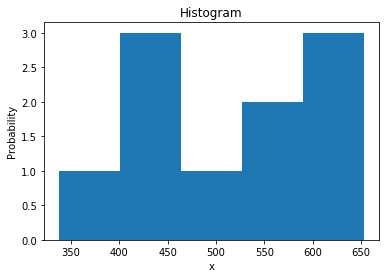

In [18]:
np.random.seed(42)
sum_for_hist = []
n = 100
for i in range(0, 10):
    print(f'i = {i}: ', end='')
    x_sum = 0
    for j in range(0, 10):
        x_i = np.random.randint(0, n)
        print(f'{x_i}', end=', ')
        x_sum += x_i
    print(f'sum: {x_sum}')
    sum_for_hist.append(x_sum)
    print()

num_bins = 5
n, bins, patches = plt.hist(sum_for_hist, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')
plt.show()

**3\.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.**

In [19]:
# Формула Бернулли
# Pn(k) = C(n, k) * p**k * q**(n − k), q = 1 - p
# p - вероятность наступления события
# n - общее количество испытаний
# k - количество испытаний с наступившим событием
# Для p = 1/2: Pn(k) = C(k, n) * 1/2**n
def bernoulli_for_coin(k, n):
    return (factorial(n) // (factorial(k) * factorial(n - k))) * 1/2**n

In [20]:
np.random.seed(42)
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
# print(a, b, c, d, sep="\n")
# print(x)
print(k, n, k/n)
print(bernoulli_for_coin(k, n))

3714 10000 0.3714
4.392251494256108e-148


In [21]:
# получаем вероятность появления события выпадения двух орлов и двух решек k раз при n независимых испытаниях - 
# вероятность того, что при каждом следующем испытании будет выполняться условие (происходить событие)

**3\.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.**

In [22]:
# Выпадет 1 орёл и 3 решки
np.random.seed(42)
k, n = 0, 10
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 1:
        k = k + 1
# print(a, b, c, d, sep="\n")
# print(x)
print(f'Количество успехов: {k}, Общее количество испытаний: {n}, Оценка вероятности: {k/n}')
print(f'Вероятность {k} успехов в последовательности из {n} независимых испытаний: {bernoulli_for_coin(k, n)}')

Количество успехов: 2, Общее количество испытаний: 10, Оценка вероятности: 0.2
Вероятность 2 успехов в последовательности из 10 независимых испытаний: 0.0439453125


**4\. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.**

In [23]:
# Перестановка
for p in itertools.permutations("523", 3):
    print(''.join(str(x) for x in p))

523
532
253
235
352
325


In [24]:
# Сочетание
for p in itertools.combinations("0123456789", 9):
    print(''.join(p))

012345678
012345679
012345689
012345789
012346789
012356789
012456789
013456789
023456789
123456789


In [25]:
# Размещение
for p in itertools.product("481",repeat=2):
    print(''.join(p))

44
48
41
84
88
81
14
18
11


**5\. Дополните код расчетом коэффициента корреляции x и y по формуле**  
${\Large
\begin{equation}R = \frac{\sum (x_i\ -\ x_m)\cdot(y_i\ -\ y_m)}{\sqrt{\sum {(x_i\ -\ x_m)}^2 \cdot \sum {(y_i\ -\ y_m)}^2}}\end{equation} }$

Величины по формулам: 

a = 0.6899405068361129, b = 0.15407929692031133, R = 0.919277701560806

Величины, рассчитанные с помощью модуля numpy: 

a = 0.6899405068361143, b = 0.15407929692031072, R = 0.9192777015608059


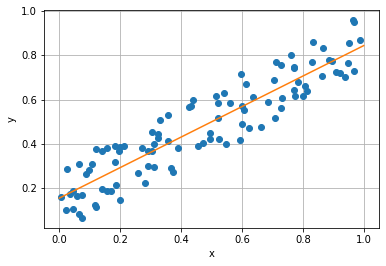

In [26]:
n = 100
r = 0.7
np.random.seed(42)
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
x_mean = np.mean(x)
y_mean = np.mean(y)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
R = np.sum((x - x_mean)*(y - y_mean))/np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond = None)[0]
R1 = np.corrcoef(x, y)
print(f'Величины по формулам: \n\na = {a}, b = {b}, R = {R}\n')
print(f'Величины, рассчитанные с помощью модуля numpy: \n\na = {a1}, b = {b1}, R = {R1[0][1]}')
plt.plot([0, 1], [b, a + b])
plt.show()